In [2]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

data_dir = 'poop_data'

# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')
    
%matplotlib inline

In [3]:
metadata = pd.read_csv(data_dir + '/metadata.tsv', sep='\t')
metadata.head(5)

,sampleid,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,...,HEA_lung_disease,HEA_mental_illness,HEA_migraine,HEA_seasonal_allergies,HEA_sibo,HEA_skin_condition,HEA_sleep_duration,HEA_smoking_frequency,HEA_thyroid,HEA_weight_change
0,10317.000046,20s,20.0,Normal,23.75,False,2016-08-25 18:30:00,USA,True,1919.3,...,False,False,False,True,False,False,8 or more hours,Never,False,Decreased more than 10 pounds
1,10317.000050,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,...,False,False,False,False,False,True,7-8 hours,Never,False,Remained stable
2,10317.000038,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,...,False,False,False,False,False,False,7-8 hours,Not provided,False,Remained stable
3,10317.000047,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,...,False,False,True,False,False,True,6-7 hours,Never,True,Decreased more than 10 pounds
4,10317.000046,40s,45.0,Normal,23.15,False,2016-05-24 19:00:00,United Kingdom,True,68.8,...,False,False,False,True,False,True,6-7 hours,Never,False,Remained stable


### Stacked bar

### 5 diseases & Antibiotic history
select top 5 diseases with True, the draw a graph with HEA_antibiotic_history

In [4]:
HEA_ibd=['HEA_ibd','HEA_antibiotic_history']
ibd=metadata.loc[:, HEA_ibd]
ibd_true=ibd[ibd.HEA_ibd==True]
ibd_true['Catagory']='HEA_ibd'
ibd_true

year=ibd_true[ibd_true['HEA_antibiotic_history']=='Year']

six_months=ibd_true[ibd_true['HEA_antibiotic_history']=='6 months']

Month=ibd_true[ibd_true['HEA_antibiotic_history']=='Month']

Week=ibd_true[ibd_true['HEA_antibiotic_history']=='Week']

not_taken_in_the_past_year=ibd_true[ibd_true['HEA_antibiotic_history']=='I have not taken antibiotics in the past year.']

Not_provided=ibd_true[ibd_true['HEA_antibiotic_history']=='Not provided']


data1=['HEA_ibd',year['Catagory'].count(),six_months['Catagory'].count(),Month['Catagory'].count()
,Week['Catagory'].count(),not_taken_in_the_past_year['Catagory'].count(),Not_provided['Catagory'].count()]
data1

['HEA_ibd', 5, 4, 6, 3, 16, 0]

In [5]:
HEA_cdiff=['HEA_cdiff','HEA_antibiotic_history']
cdiff=metadata.loc[:, HEA_cdiff]
cdiff_true=cdiff[cdiff.HEA_cdiff==True]
cdiff_true['Catagory']='HEA_cdiff'

year=cdiff_true[cdiff_true['HEA_antibiotic_history']=='Year']

six_months=cdiff_true[cdiff_true['HEA_antibiotic_history']=='6 months']

Month=cdiff_true[cdiff_true['HEA_antibiotic_history']=='Month']

Week=cdiff_true[cdiff_true['HEA_antibiotic_history']=='Week']

not_taken_in_the_past_year=cdiff_true[cdiff_true['HEA_antibiotic_history']=='I have not taken antibiotics in the past year.']

Not_provided=cdiff_true[cdiff_true['HEA_antibiotic_history']=='Not provided']


data2=['HEA_cdiff',year['Catagory'].count(),six_months['Catagory'].count(),Month['Catagory'].count()
,Week['Catagory'].count(),not_taken_in_the_past_year['Catagory'].count(),Not_provided['Catagory'].count()]
data2

['HEA_cdiff', 2, 2, 1, 0, 2, 0]

In [6]:
HEA_sibo=['HEA_sibo','HEA_antibiotic_history']
sibo=metadata.loc[:, HEA_sibo]
sibo_true=sibo[sibo.HEA_sibo==True]
sibo_true['Catagory']='HEA_sibo'

year=sibo_true[sibo_true['HEA_antibiotic_history']=='Year']

six_months=sibo_true[sibo_true['HEA_antibiotic_history']=='6 months']

Month=sibo_true[sibo_true['HEA_antibiotic_history']=='Month']

Week=sibo_true[sibo_true['HEA_antibiotic_history']=='Week']

not_taken_in_the_past_year=sibo_true[sibo_true['HEA_antibiotic_history']=='I have not taken antibiotics in the past year.']

Not_provided=sibo_true[sibo_true['HEA_antibiotic_history']=='Not provided']


data3=['HEA_sibo',year['Catagory'].count(),six_months['Catagory'].count(),Month['Catagory'].count()
,Week['Catagory'].count(),not_taken_in_the_past_year['Catagory'].count(),Not_provided['Catagory'].count()]
data3

['HEA_sibo', 0, 5, 3, 3, 16, 0]

In [7]:
HEA_acid_reflux=['HEA_acid_reflux','HEA_antibiotic_history']
acid_reflux=metadata.loc[:, HEA_acid_reflux]
acid_reflux_true=acid_reflux[acid_reflux.HEA_acid_reflux==True]
acid_reflux_true['Catagory']='HEA_acid_reflux'

year=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='Year']

six_months=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='6 months']

Month=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='Month']

Week=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='Week']

not_taken_in_the_past_year=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='I have not taken antibiotics in the past year.']

Not_provided=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='Not provided']


data4=['HEA_acid_reflux',year['Catagory'].count(),six_months['Catagory'].count(),Month['Catagory'].count()
,Week['Catagory'].count(),not_taken_in_the_past_year['Catagory'].count(),Not_provided['Catagory'].count()]
data4

['HEA_acid_reflux', 17, 20, 4, 2, 50, 0]

In [8]:
HEA_thyroid=['HEA_thyroid','HEA_antibiotic_history']
thyroid=metadata.loc[:, HEA_thyroid]
thyroid_true=thyroid[thyroid.HEA_thyroid==True]
thyroid_true['Catagory']='HEA_thyroid'

year=thyroid_true[thyroid_true['HEA_antibiotic_history']=='Year']

six_months=thyroid_true[thyroid_true['HEA_antibiotic_history']=='6 months']

Month=thyroid_true[thyroid_true['HEA_antibiotic_history']=='Month']

Week=thyroid_true[thyroid_true['HEA_antibiotic_history']=='Week']

not_taken_in_the_past_year=thyroid_true[thyroid_true['HEA_antibiotic_history']=='I have not taken antibiotics in the past year.']

Not_provided=thyroid_true[thyroid_true['HEA_antibiotic_history']=='Not provided']


data5=['HEA_thyroid',year['Catagory'].count(),six_months['Catagory'].count(),Month['Catagory'].count()
,Week['Catagory'].count(),not_taken_in_the_past_year['Catagory'].count(),Not_provided['Catagory'].count()]
data5

['HEA_thyroid', 9, 9, 1, 1, 33, 0]

In [9]:
data=[data1,data2,data3,data4,data5]
df=pd.DataFrame(data,columns=['Catagory','Year','6 months','Month','Week','I have not taken antibiotics in the past year.','Not provided'])
df

,Catagory,Year,6 months,Month,Week,I have not taken antibiotics in the past year.,Not provided
0,HEA_ibd,5,4,6,3,16,0
1,HEA_cdiff,2,2,1,0,2,0
2,HEA_sibo,0,5,3,3,16,0
3,HEA_acid_reflux,17,20,4,2,50,0
4,HEA_thyroid,9,9,1,1,33,0


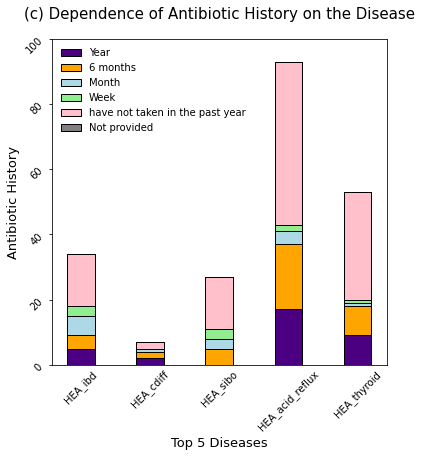

In [13]:
x = df['Catagory']
y1 = df['Year']
y2 = df['6 months']
y3 =df['Month']
y4 =df['Week']
y5 =df['I have not taken antibiotics in the past year.']
y6 =df['Not provided']
plt.figure(figsize=(6, 6))
plt.bar(x,y1,width=0.4,label='Year',color='indigo',edgecolor='black')
plt.bar(x,y2,width=0.4,bottom=y1,label='6 months',color='orange',edgecolor='black')
plt.bar(x,y3,width=0.4,bottom=y1+y2,label='Month',color='lightblue',edgecolor='black')
plt.bar(x,y4,width=0.4,bottom=y1+y2+y3,label='Week',color='lightgreen',edgecolor='black')
plt.bar(x,y5,width=0.4,bottom=y1+y2+y3+y4,label='have not taken in the past year',color='pink',edgecolor='black')
plt.bar(x,y6,width=0.4,bottom=y1+y2+y3+y4+y5,label='Not provided',color='grey',edgecolor='black')


plt.tick_params(axis='x',length=0)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.ylim(0,100)

plt.xlabel('Top 5 Diseases',fontsize=13)
plt.ylabel('Antibiotic History',fontsize=13)
plt.title('(c) Dependence of Antibiotic History on the Disease',fontsize=15,pad=20)
plt.legend(loc=2,frameon=False,fontsize=10)
plt.show()

### 5 diseases & SEX

In [15]:
sex_HEA_ibd=['HEA_ibd','GEN_sex']
sex_ibd=metadata.loc[:, sex_HEA_ibd]
sex_ibd_true=sex_ibd[sex_ibd.HEA_ibd==True]
sex_ibd_true['Cata']='HEA_ibd'

female=sex_ibd_true[sex_ibd_true['GEN_sex']=='female']

male=sex_ibd_true[sex_ibd_true['GEN_sex']=='male']

other=sex_ibd_true[sex_ibd_true['GEN_sex']=='other']

Not_provided=sex_ibd_true[sex_ibd_true['GEN_sex']=='Not provided']


datas1=['HEA_ibd',female['Cata'].count(),male['Cata'].count()
,other['Cata'].count(),Not_provided['Cata'].count()]
datas1

['HEA_ibd', 16, 18, 0, 0]

In [16]:
sex_HEA_cdiff=['HEA_cdiff','GEN_sex']
sex_cdiff=metadata.loc[:, sex_HEA_cdiff]
sex_cdiff_true=sex_cdiff[sex_cdiff.HEA_cdiff==True]
sex_cdiff_true['Cata']='HEA_cdiff'

female=sex_cdiff_true[sex_cdiff_true['GEN_sex']=='female']

male=sex_cdiff_true[sex_cdiff_true['GEN_sex']=='male']

other=sex_cdiff_true[sex_cdiff_true['GEN_sex']=='other']

Not_provided=sex_cdiff_true[sex_cdiff_true['GEN_sex']=='Not provided']


datas2=['HEA_cdiff',female['Cata'].count(),male['Cata'].count()
,other['Cata'].count(),Not_provided['Cata'].count()]
datas2

['HEA_cdiff', 5, 2, 0, 0]

In [17]:
sex_HEA_sibo=['HEA_sibo','GEN_sex']
sex_sibo=metadata.loc[:, sex_HEA_sibo]
sex_sibo_true=sex_sibo[sex_sibo.HEA_sibo==True]
sex_sibo_true['Cata']='HEA_sibo'

female=sex_sibo_true[sex_sibo_true['GEN_sex']=='female']

male=sex_sibo_true[sex_sibo_true['GEN_sex']=='male']

other=sex_sibo_true[sex_sibo_true['GEN_sex']=='other']

Not_provided=sex_sibo_true[sex_sibo_true['GEN_sex']=='Not provided']


datas3=['HEA_sibo',female['Cata'].count(),male['Cata'].count()
,other['Cata'].count(),Not_provided['Cata'].count()]
datas3

['HEA_sibo', 18, 9, 0, 0]

In [18]:
sex_HEA_acid_reflux=['HEA_acid_reflux','GEN_sex']
sex_acid_reflux=metadata.loc[:, sex_HEA_acid_reflux]
sex_acid_reflux_true=sex_acid_reflux[sex_acid_reflux.HEA_acid_reflux==True]
sex_acid_reflux_true['Cata']='HEA_acid_reflux'

female=sex_acid_reflux_true[sex_acid_reflux_true['GEN_sex']=='female']

male=sex_acid_reflux_true[sex_acid_reflux_true['GEN_sex']=='male']

other=sex_acid_reflux_true[sex_acid_reflux_true['GEN_sex']=='other']

Not_provided=sex_acid_reflux_true[sex_acid_reflux_true['GEN_sex']=='Not provided']


datas4=['HEA_acid_reflux',female['Cata'].count(),male['Cata'].count()
,other['Cata'].count(),Not_provided['Cata'].count()]
datas4

['HEA_acid_reflux', 54, 39, 0, 0]

In [19]:
sex_HEA_thyroid=['HEA_thyroid','GEN_sex']
sex_thyroid=metadata.loc[:, sex_HEA_thyroid]
sex_thyroid_true=sex_acid_reflux[sex_thyroid.HEA_thyroid==True]
sex_thyroid_true['Cata']='HEA_thyroid'

female=sex_thyroid_true[sex_thyroid_true['GEN_sex']=='female']

male=sex_thyroid_true[sex_thyroid_true['GEN_sex']=='male']

other=sex_thyroid_true[sex_thyroid_true['GEN_sex']=='other']

Not_provided=sex_thyroid_true[sex_thyroid_true['GEN_sex']=='Not provided']


datas5=['HEA_thyroid',female['Cata'].count(),male['Cata'].count()
,other['Cata'].count(),Not_provided['Cata'].count()]
datas5

['HEA_thyroid', 46, 6, 0, 1]

In [20]:
datas=[datas1,datas2,datas3,datas4,datas5]
dfs=pd.DataFrame(datas,columns=['Cata','female','male','other','Not provided'])
dfs

,Cata,female,male,other,Not provided
0,HEA_ibd,16,18,0,0
1,HEA_cdiff,5,2,0,0
2,HEA_sibo,18,9,0,0
3,HEA_acid_reflux,54,39,0,0
4,HEA_thyroid,46,6,0,1


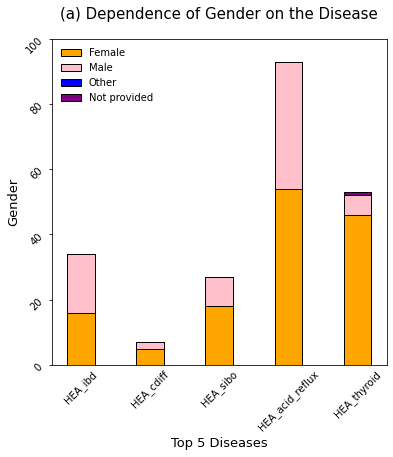

In [21]:
x = dfs['Cata']
y1 = dfs['female']
y2 = dfs['male']
y3 =dfs['other']
y4 =dfs['Not provided']
plt.figure(figsize=(6, 6))
plt.bar(x,y1,width=0.4,label='Female',color='orange',edgecolor='black')
plt.bar(x,y2,width=0.4,bottom=y1,label='Male',color='pink',edgecolor='black')
plt.bar(x,y3,width=0.4,bottom=y1+y2,label='Other',color='blue',edgecolor='black')
plt.bar(x,y4,width=0.4,bottom=y1+y2+y3,label='Not provided',color='purple',edgecolor='black')


plt.tick_params(axis='x',length=0)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.ylim(0,100)

plt.xlabel('Top 5 Diseases',fontsize=13)
plt.ylabel('Gender',fontsize=13)
plt.title('(a) Dependence of Gender on the Disease',fontsize=15, pad=20)
plt.legend(loc=2,frameon=False,fontsize=10)
plt.show()

### 5 diseases & BMI_CAT

In [22]:
bmi_HEA_ibd=['HEA_ibd','GEN_bmi_cat']
bmi_ibd=metadata.loc[:, bmi_HEA_ibd]
bmi_ibd_true=bmi_ibd[bmi_ibd.HEA_ibd==True]
bmi_ibd_true['Catab']='HEA_ibd'

Normal=bmi_ibd_true[bmi_ibd_true['GEN_bmi_cat']=='Normal']

Underweight=bmi_ibd_true[bmi_ibd_true['GEN_bmi_cat']=='Underweight']

Overweight=bmi_ibd_true[bmi_ibd_true['GEN_bmi_cat']=='Overweight']

Obese=bmi_ibd_true[bmi_ibd_true['GEN_bmi_cat']=='Obese']

Not_provided=bmi_ibd_true[bmi_ibd_true['GEN_bmi_cat']=='Not provided']


datab1=['HEA_ibd',Normal['Catab'].count(),Underweight['Catab'].count(),Overweight['Catab'].count()
,Obese['Catab'].count(),Not_provided['Catab'].count()]
datab1

['HEA_ibd', 14, 2, 16, 1, 1]

In [23]:
bmi_HEA_cdiff=['HEA_cdiff','GEN_bmi_cat']
bmi_cdiff=metadata.loc[:, bmi_HEA_cdiff]
bmi_cdiff_true=bmi_cdiff[bmi_cdiff.HEA_cdiff==True]
bmi_cdiff_true['Catab']='HEA_cdiff'

Normal=bmi_cdiff_true[bmi_cdiff_true['GEN_bmi_cat']=='Normal']

Underweight=bmi_cdiff_true[bmi_cdiff_true['GEN_bmi_cat']=='Underweight']

Overweight=bmi_cdiff_true[bmi_cdiff_true['GEN_bmi_cat']=='Overweight']

Obese=bmi_cdiff_true[bmi_cdiff_true['GEN_bmi_cat']=='Obese']

Not_provided=bmi_cdiff_true[bmi_cdiff_true['GEN_bmi_cat']=='Not provided']


datab2=['HEA_cdiff',Normal['Catab'].count(),Underweight['Catab'].count(),Overweight['Catab'].count()
,Obese['Catab'].count(),Not_provided['Catab'].count()]
datab2

['HEA_cdiff', 3, 0, 3, 1, 0]

In [33]:
bmi_HEA_acid_reflux=['HEA_acid_reflux','GEN_bmi_cat']
bmi_acid_reflux=metadata.loc[:, bmi_HEA_acid_reflux]
bmi_acid_reflux_true=bmi_acid_reflux[bmi_acid_reflux.HEA_acid_reflux==True]
bmi_acid_reflux_true['Catab']='HEA_cdiff'

Normal=bmi_acid_reflux_true[bmi_acid_reflux_true['GEN_bmi_cat']=='Normal']

Underweight=bmi_acid_reflux_true[bmi_acid_reflux_true['GEN_bmi_cat']=='Underweight']

Overweight=bmi_acid_reflux_true[bmi_acid_reflux_true['GEN_bmi_cat']=='Overweight']

Obese=bmi_acid_reflux_true[bmi_acid_reflux_true['GEN_bmi_cat']=='Obese']

Not_provided=bmi_acid_reflux_true[bmi_acid_reflux_true['GEN_bmi_cat']=='Not provided']


datab4=['HEA_acid_reflux',Normal['Catab'].count(),Underweight['Catab'].count(),Overweight['Catab'].count()
,Obese['Catab'].count(),Not_provided['Catab'].count()]
datab4

['HEA_acid_reflux', 38, 4, 30, 20, 1]

In [34]:
bmi_HEA_sibo=['HEA_sibo','GEN_bmi_cat']
bmi_sibo=metadata.loc[:, bmi_HEA_sibo]
bmi_sibo_true=bmi_sibo[bmi_sibo.HEA_sibo==True]
bmi_sibo_true['Catab']='HEA_sibo'

Normal=bmi_sibo_true[bmi_sibo_true['GEN_bmi_cat']=='Normal']

Underweight=bmi_sibo_true[bmi_sibo_true['GEN_bmi_cat']=='Underweight']

Overweight=bmi_sibo_true[bmi_sibo_true['GEN_bmi_cat']=='Overweight']

Obese=bmi_sibo_true[bmi_sibo_true['GEN_bmi_cat']=='Obese']

Not_provided=bmi_sibo_true[bmi_sibo_true['GEN_bmi_cat']=='Not provided']


datab3=['HEA_sibo',Normal['Catab'].count(),Underweight['Catab'].count(),Overweight['Catab'].count()
,Obese['Catab'].count(),Not_provided['Catab'].count()]
datab3

['HEA_sibo', 20, 1, 1, 4, 1]

In [35]:
bmi_HEA_thyroid=['HEA_thyroid','GEN_bmi_cat']
bmi_thyroid=metadata.loc[:, bmi_HEA_thyroid]
bmi_thyroid_true=bmi_thyroid[bmi_thyroid.HEA_thyroid==True]
bmi_thyroid_true['Catab']='HEA_thyroid'

Normal=bmi_thyroid_true[bmi_thyroid_true['GEN_bmi_cat']=='Normal']

Underweight=bmi_thyroid_true[bmi_thyroid_true['GEN_bmi_cat']=='Underweight']

Overweight=bmi_thyroid_true[bmi_thyroid_true['GEN_bmi_cat']=='Overweight']

Obese=bmi_thyroid_true[bmi_thyroid_true['GEN_bmi_cat']=='Obese']

Not_provided=bmi_thyroid_true[bmi_thyroid_true['GEN_bmi_cat']=='Not provided']


datab5=['HEA_thyroid',Normal['Catab'].count(),Underweight['Catab'].count(),Overweight['Catab'].count()
,Obese['Catab'].count(),Not_provided['Catab'].count()]
datab5

['HEA_thyroid', 22, 3, 21, 6, 1]

In [36]:
datas=[datab1,datab2,datab3,datab4,datab5]
dfb=pd.DataFrame(datas,columns=['Catab','Normal','Underweight','Overweight','Obese','Not provided'])
dfb

,Catab,Normal,Underweight,Overweight,Obese,Not provided
0,HEA_ibd,14,2,16,1,1
1,HEA_cdiff,3,0,3,1,0
2,HEA_sibo,20,1,1,4,1
3,HEA_acid_reflux,38,4,30,20,1
4,HEA_thyroid,22,3,21,6,1


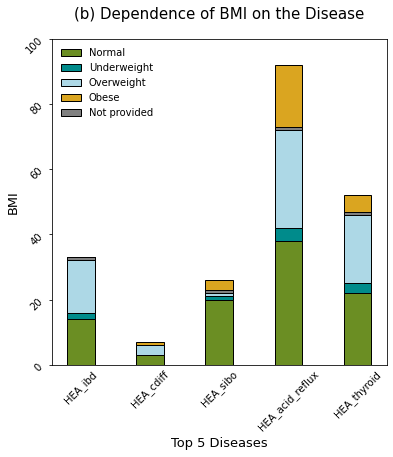

In [38]:
x = dfb['Catab']
y1 = dfb['Normal']
y2 = dfb['Underweight']
y3 =dfb['Overweight']
y4 =dfb['Obese']
y5 =dfb['Not provided']
plt.figure(figsize=(6, 6))
plt.bar(x,y1,width=0.4,label='Normal',color='olivedrab',edgecolor='black')
plt.bar(x,y2,width=0.4,bottom=y1,label='Underweight',color='darkcyan',edgecolor='black')
plt.bar(x,y3,width=0.4,bottom=y1+y2,label='Overweight',color='lightblue',edgecolor='black')
plt.bar(x,y4,width=0.4,bottom=y1+y2+y3,label='Obese',color='goldenrod',edgecolor='black')
plt.bar(x,y5,width=0.4,bottom=y1+y2+y3,label='Not provided',color='grey',edgecolor='black')

plt.tick_params(axis='x',length=0)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.ylim(0,100)

plt.xlabel('Top 5 Diseases',fontsize=13)
plt.ylabel('BMI',fontsize=13)
plt.title('(b) Dependence of BMI on the Disease',fontsize=15, pad=20)
plt.legend(loc=2,frameon=False,fontsize=10)
plt.show()